# 외부운용 데이터 분석

## 1. 데이터 전처리 

### 1) 기초 설정

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import rc
import pandas as pd
import numpy as np
import os



rc('font', family='Malgun Gothic')
pd.options.display.float_format= '{:,.2f}'.format
mp.rcParams['axes.unicode_minus'] = False

### 2) 파일 불러오기

In [ ]:
datafile = [file for file in os.listdir() if 'dataset' in file][0]
dataset = pd.read_pickle(datafile, compression='gzip')
dataset.보유일자 = pd.DatetimeIndex(dataset.보유일자)
dataset = dataset[dataset.보유일자>'2015-01-01']
dataset.to_csv('raw_data_2.csv', compression='gzip')

### 3) 연도별(행) / 과목별(열) 장부금액 생성

In [ ]:
a= pd.read_excel('https://maeng-gun.github.io/pandas/raw_data_1.xlsx', thousands=',')

,지역본부,시군지부,사무소명,사무소코드,과목,상품종류,종목명,자산구분,발행일,만기일,...,미수이자,예수법인세의제,최초장부금액,시장수익율,발행회사,거래회사,농축협예수사무소코드,평가손익,매입신용등급,계속보유여부검토대상
0,강원지역본부,강릉시지부,강릉농협,333050,채권,금융채,현대캐피탈1474,매도가능,2014-01-07,2021-01-07,...,1920391,0,2002279609,1.51,현대캐피탈(주),삼성증권(주),nan,57020083,AA+,NaN
1,강원지역본부,강릉시지부,강릉농협,333050,채권,금융채,국민은행3306이표일(3)07후-24,매도가능,2013-06-24,2020-06-24,...,0,0,2005653261,1.21,(주)국민은행,삼성증권(주),nan,18721556,AA+,NaN
2,강원지역본부,강릉시지부,강릉농협,333050,채권,금융채,현대커머셜236,매도가능,2016-04-07,2026-04-07,...,0,0,2008600000,2.14,현대커머셜(주),엔에이치투자증권(주),nan,70641649,AA-,NaN
3,강원지역본부,강릉시지부,강릉농협,333050,채권,금융채,현대커머셜360-4,매도가능,2019-06-24,2029-06-24,...,0,0,1575143871,2.67,현대커머셜(주),삼성증권(주),nan,14556643,AA-,NaN
4,강원지역본부,강릉시지부,강릉농협,333050,채권,금융채(특금),팬택관련 채권,만기보유,2006-05-24,2018-12-31,...,0,0,55078604,2.67,(주)팬택자산관리,농협은행(주),nan,0,AAA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,충북지역본부,충주시지부,주덕농협,417059,채권,회사채,현대상선176-2,매도가능,2011-04-07,2021-04-07,...,0,0,209561718,2.50,현대상선(주),엔에이치투자증권(주),nan,0,A,NaN
1671,충북지역본부,충주시지부,충주농협,417015,대내외예치금,농축협예치금,남제천농협 정기예치 (남제천농협),기타유가,2019-04-24,2020-04-24,...,0,0,2000000000,2.50,농축협공통,농축협공통,"421,078.00",0,NaN,NaN
1672,충북지역본부,충주시지부,충주농협,417015,채권,회사채,현대상선177-2,매도가능,2011-07-07,2021-04-07,...,0,0,102193407,2.50,현대상선(주),엔에이치투자증권(주),nan,0,A,NaN
1673,충북지역본부,충주시지부,충주농협,417015,채권,회사채,동부메탈10-1,매도가능,2012-04-16,2020-02-16,...,0,0,240660067,2.50,(주)동부메탈,엔에이치투자증권(주),nan,0,BBB+,NaN


In [ ]:
pd.read_csv('https://maeng-gun.github.io/pandas/raw_data_2.csv', thousands=',', compression='gzip')

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,지역본부,시군지부,사무소명,사무소코드,과목,상품종류,표준코드,계좌번호,종목명,...,최초장부금액,시장수익율,발행회사,거래회사,농축협예수사무소코드,평가손익,매입신용등급,계속보유여부검토대상,매입수익률*장부금액,보유일자
0,568304,서울,서울지역본부,영동농협,100012,대내외예치금,농축협예치금,DA1000120063,100012-134-000721,정기예탁금(능서농협),...,"1,000,000,000.00",3.50,농축협공통,농축협공통,"203,049.00",0,NaN,NaN,32.50,2015-01-31
1,568305,서울,서울지역본부,영동농협,100012,대내외예치금,농축협예치금,DA1000120064,100012-134-000734,정기예탁금(남면농협),...,"3,000,000,000.00",3.50,농축협공통,농축협공통,"201,162.00",0,NaN,NaN,96.00,2015-01-31
2,568306,서울,서울지역본부,영동농협,100012,대내외예치금,농축협예치금,DA1000120065,100012-134-000748,정기예탁금(은현농협),...,"3,300,000,000.00",3.50,농축협공통,농축협공통,"201,173.00",0,NaN,NaN,105.60,2015-01-31
3,568307,서울,서울지역본부,영동농협,100012,대내외예치금,농축협예치금,DA1000120070,100012-134-000796,정기예탁금(개군농협),...,"3,500,000,000.00",3.50,농축협공통,농축협공통,"231,046.00",0,NaN,NaN,108.50,2015-01-31
4,568308,서울,서울지역본부,영동농협,100012,대내외예치금,농축협예치금,DA1000120073,100012-134-000825,정기예탁금(물금농협),...,"3,000,000,000.00",3.50,농축협공통,농축협공통,"813,060.00",0,NaN,NaN,93.00,2015-01-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229000,797304,제주,제주시지부,제주시농협,901018,대내외예치금,농축협예치금,DA9010180047,901018-134-000786,정기예탁금 (애월농협),...,"5,000,000,000.00",6.50,농축협공통,농축협공통,"901,125.00",0,NaN,NaN,82.50,2020-08-31
229001,797305,제주,제주시지부,제주시농협,901018,대내외예치금,농축협예치금,DA9010180048,901018-134-000790,정기예탁금 (회천농협),...,"3,000,000,000.00",6.50,농축협공통,농축협공통,"621,047.00",0,NaN,NaN,42.00,2020-08-31
229002,797306,제주,서귀포시지부,대정농협,903013,채권,회사채,KR6117931263,903013-134-000348,한진해운76-2,...,"4,028,513,044.00",6.50,(주)한진해운,유안타증권(주),nan,0,A-,NaN,0.00,2020-08-31
229003,797307,제주,서귀포시지부,안덕농협,903024,유동자산,자산유동화기업어음(ABCP),CP0000021581,903024-134-000181,루카스ABCP,...,"324,772,621.00",6.50,루카스(주),엔에이치투자증권(주),nan,0,A2,NaN,0.00,2020-08-31


In [ ]:
asset_m = dataset.pivot_table(values='장부금액', index='보유일자', columns='과목',
                              aggfunc='sum', margins=True, margins_name='총액')
asset_m.drop('총액',axis=0,inplace=True)
asset_m=asset_m[['총액','채권','대내외예치금','수익증권','유동자산']]
asset_m.index= pd.to_datetime(asset_m.index)
asset_m.loc['2020']

과목,총액,채권,대내외예치금,수익증권,유동자산
보유일자,,,,,
2020-01-31,"14,890.10","9,278.05","4,127.60","1,314.50",169.95
2020-02-29,"14,536.77","9,213.96","3,843.60","1,309.25",169.95
2020-03-31,"15,117.73","9,360.89","4,191.10","1,426.25",139.49
2020-04-30,"15,277.77","9,466.48","4,268.80","1,406.25",136.24
2020-05-31,"15,277.44","9,282.61","4,514.80","1,343.79",136.24
2020-06-30,"15,178.98","9,395.24","4,483.50","1,292.41",7.83
2020-07-31,"14,769.75","9,060.45","4,549.00","1,155.18",5.12
2020-08-31,"15,020.29","9,290.76","4,622.50","1,101.90",5.12


### 4) 데이터 시프트

과목,총액,채권,대내외예치금,수익증권,유동자산
보유일자,,,,,
2010-01-31,nan,nan,nan,nan,nan
2010-02-28,0.01,0.01,0.02,-0.06,0.01
2010-03-31,0.01,-0.02,0.03,0.04,0.05
2010-04-30,-0.02,0.01,-0.06,-0.00,-0.08
2010-05-31,-0.00,0.01,-0.03,-0.00,-0.03
...,...,...,...,...,...
2020-04-30,0.01,0.01,0.02,-0.01,-0.02
2020-05-31,-0.00,-0.02,0.06,-0.05,0.00
2020-06-30,-0.01,0.01,-0.01,-0.04,-2.86


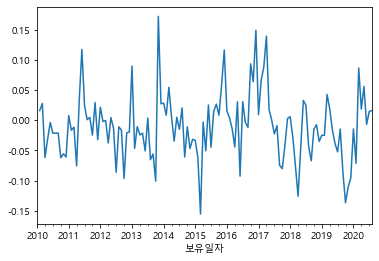

In [ ]:
ln_asset  =  np.log(asset_m)
ln_asset_1 = np.log(asset_m.shift(1))
asset_diff = ln_asset - ln_asset_1
display (asset_diff)
display (asset_diff.대내외예치금.plot())

### 5) 멀티인덱스

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   

(0, 15]       244
(15, 100]     161
(100, 701]     34
dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

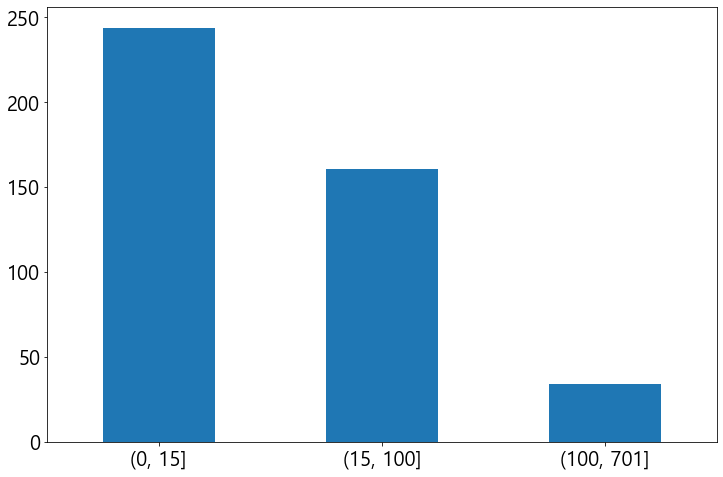

In [ ]:

df1 = dataset.set_index(['보유일자','사무소코드','과목'])
df2 = df1.loc['2020-08']
df3 = df2.pivot_table(values='장부금액',index = ['사무소코드','과목'], aggfunc='sum')
df4 = df3.sum(level=0)
display(df4.장부금액.astype('int').sort_values().values)
k=[0,15,100,701]
a=pd.cut(df4.장부금액.values, k)
b=pd.value_counts(a).sort_index()
display(b)
k.remove(0)
k[-1]='200이상'

b.plot.bar(figsize=(12,8),fontsize=20)
plt.xticks(rotation=0)


In [ ]:
data = dataset.set_index('보유일자').loc['2020-08'].reset_index(drop=True)
insolv = ['현대상선(주)','(주)웅진','웅진에너지(주)','(주)동부메탈', '루카스(주)','신재생엔에이치제삼차(유)','신재생엔에이치제육차(유)','(주)팬택자산관리']
cond = ~data.발행회사.isin(insolv) & ~data.종목명.str.contains('대신느티나무', regex=False)
data['과목']=data.과목.where(cond,'부실유가증권')

data2 = data.pivot_table(values='장부금액',index = ['사무소코드','지역본부','사무소명'],columns=['과목'],aggfunc='sum',margins=True, margins_name='합계',fill_value=0)
data2['소계']=0
data2['정상유가증권']=0
data2 = data2[data2.합계!=0]
data2 = data2.loc[:,['대내외예치금','채권','수익증권','정상유가증권','부실유가증권','소계','합계']]

data2.columns=(('대내외예치금',''),('유가증권','채권'),('유가증권','수익증권')
               ,('유가증권','정상유가증권'),('유가증권','부실유가증권')
               ,('유가증권','소계'),('합계',''))
data2[('유가증권','소계')]=data2['유가증권'].sum(axis=1)
data2=data2.sort_values(by='합계',ascending=False)
data2[('유가증권','정상유가증권')]=data2[('유가증권','채권')]+data2[('유가증권','수익증권')]
data2[('그룹','')]=' '
data2=data2.drop(('합계','',''))

사무소코드   지역본부  사무소명 
217024  경기    일산농협      
453048  대전    서부농협      
205018  경기    평택농협      
737036  경북    김천농협      
333050  강원    강릉농협      
                      ..
481021  충남    고대농협      
515117  전북    서순창농협     
817019  경남    김해농협      
455041  충남    조치원농협     
513115  전북    춘향골농협     
Name: (그룹, ), Length: 440, dtype: object

In [ ]:
cond1 = data2[('유가증권','정상유가증권')]==0
cond2 = data2[('대내외예치금')]==0
cond3 = data2[('합계','')] < 20
cond4 = (data2[('합계','')] >= 20) & (data2[('합계','')] < 50)
cond5 = (data2[('합계','')] >= 50) & (data2[('합계','')] < 100)
cond6 = (data2[('합계','')] >= 100)

cond_a = cond1 & cond2
cond_b = cond1 & ~cond2
cond_c = ~cond1 & cond3
cond_d = ~cond1 & cond4
cond_e = ~cond1 & cond5
cond_f = ~cond1 & cond6

data2.loc[cond_a,('그룹','')]='A'
data2.loc[cond_b,('그룹','')]='B'
data2.loc[cond_c,('그룹','')]='C'
data2.loc[cond_d,('그룹','')]='D'
data2.loc[cond_e,('그룹','')]='E'
data2.loc[cond_f,('그룹','')]='F'

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2866: PerformanceWarning: indexing past lexsort depth may impact performance.
  result = self._run_cell(


A    152
B     99
D     64
C     61
E     37
F     27
Name: (그룹, ), dtype: int64

In [ ]:
data3 = data2.pivot_table(index='그룹',aggfunc='sum')
data3[('사무소수','')] = data2[('그룹','')].value_counts()
data3 = data3.reindex(columns=(('사무소수',''),('대내외예치금',''),('유가증권','채권'),('유가증권','수익증권')
               ,('유가증권','정상유가증권'),('유가증권','부실유가증권')
               ,('유가증권','소계'),('합계','')))
data3.loc['합계']=data3.sum()
data3 = data3.drop(('유가증권','정상유가증권'),axis=1)
data3 = data3.rename({'합계':'외부운용 총액'}, axis=1)
data3.to_excel('사무소별 과목별 보유현황.xlsx')

## 2. 시각화 (EDA)    

### 1) 채권 장부금액 시계열 (고점 이후 하락세)

In [ ]:
condition = (asset_m.채권.index > asset_m.채권.idxmax())
bonddata_origin = asset_m[condition][['채권']]
bonddata_origin.plot()

## 5) 추세 추정(2차함수)

### 날짜를 실수로 변환하기

In [ ]:
from datetime import datetime
def datetime2year(dt): 
    """
    datetime 객체를 yyyy.xxxxxxx 형태의 실수로 변환하는 함수
    """
    year_part = dt - datetime(year=dt.year, month=1, day=1)
    year_length = datetime(year=dt.year+1, month=1, day=1) - datetime(year=dt.year, month=1, day=1)
    return dt.year + year_part/year_length
bonddata = bonddata_origin.copy()
bonddata['date'] = pd.to_datetime(bonddata.index)
bonddata['date'] = bonddata.date.apply(datetime2year)
bonddata



### OLS 돌리기

In [ ]:
import statsmodels.api as sm


result = sm.OLS.from_formula("채권 ~ date + I(date ** 2)", data=bonddata).fit()
result.summary()

In [ ]:
t = bonddata.date
y = bonddata.채권
trend = result.params[0] + result.params[1] * t + result.params[2] * t**2
plt.plot(t, y, '-', t, trend, '-')
plt.title("외부운용 채권 장부금액과 추세선")
plt.xlabel("시간")
plt.ylabel("채권 장부금액")

In [ ]:
t_test = datetime2year(datetime(2020,8,31))
X_test = pd.DataFrame([t_test], columns=['date'])
result.predict(X_test)

In [ ]:
result.resid.plot()
plt.show()